#HW3　Monte Carlo control algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
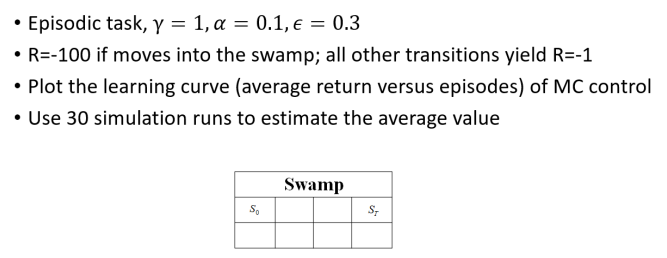

In [ ]:
# left, up, right, down
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]
gamma = 1
alpha = 0.1
epsilon = 0.3
S0 = [0,1]
ST = [3,1]

In [ ]:
# Maintain state with list datatype.
def step(state, action):
  swamp = [[0,2],[1,2],[2,2],[3,2]]
  
  state = np.array(state)
  state_n = (state+action)
  x , y = state_n
  x = np.clip(x,0,3)
  y = np.clip(y,0,2)
  state_n = [x , y]


  if state_n in swamp:
    reward = -100
  else:
    reward = -1
  
  return state_n, reward

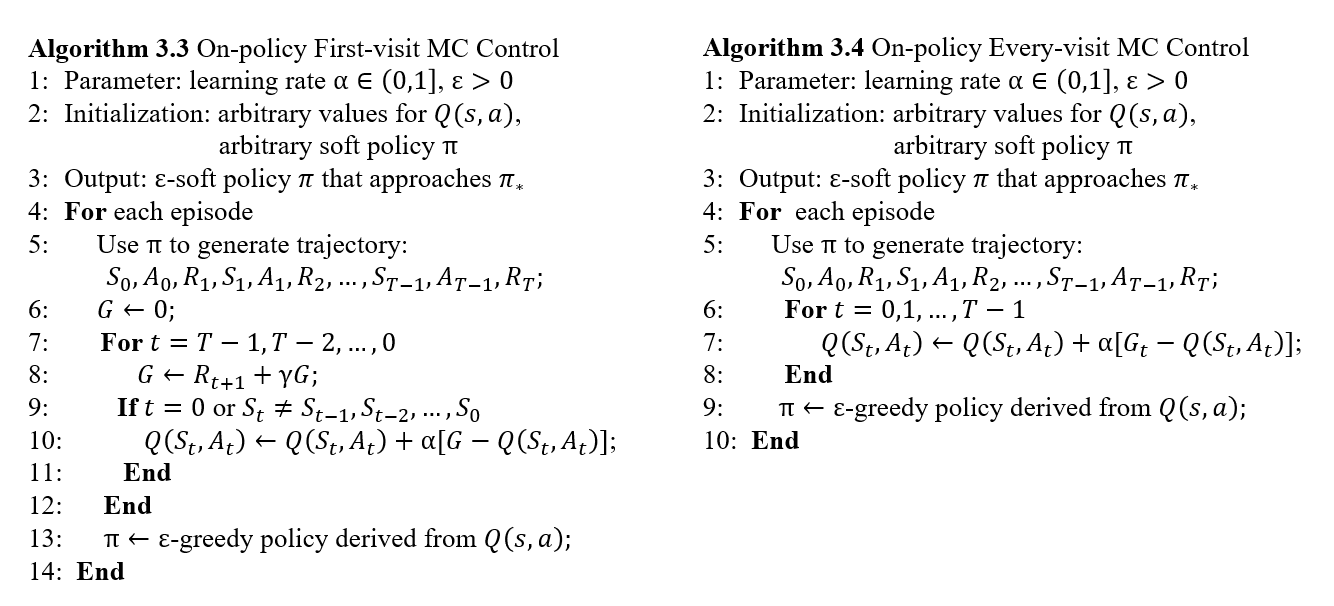

In [ ]:
def episode():

  returns = 0
  T = 0
  trajectory = []
  state = S0
  
  while state != ST:

    rand_probability = rd.random()

    if rand_probability <= epsilon:
      action_choose = rd.randint(0,4)

    else:
      action_choose = np.argmax(q_value[state[0]][state[1]])
      
    action = ACTIONS[action_choose]
    
    state_ , reward = step(state,action)

    
    trajectory.append([state,action_choose,state_,reward])
    state = state_
    T = T + 1
  
  TT = list(range(T))

  for i in reversed(TT):
    returns =  trajectory[i][3] + gamma * returns
    x , y = trajectory[i][0]
    a = trajectory[i][1]
    q_value[x][y][a] = q_value[x][y][a] + alpha*(returns-q_value[x][y][a])
    
  return returns

# Result(60%):

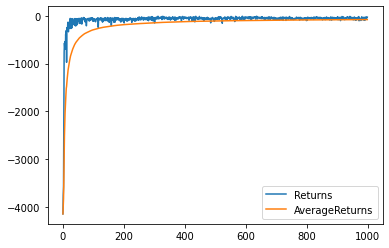

In [ ]:
# use 30 simulation, 1000 episode per simulation.

episode_num = 1000

Returns_all=[]
AverageReturns_all=[]

for i in range(30):
  Returns = []
  AverageReturns = []
  q_value = rd.rand(4,3,len(ACTIONS))
  q_value[3][1][:] = 0
  for j in range(episode_num):
    Returns.append(episode())
    AverageReturns.append(np.average(Returns))
  Returns_all.append(np.array(Returns))  
  AverageReturns_all.append(np.array(AverageReturns))
    
plt.figure()
plt.plot(np.average(Returns_all,axis=0),label="Returns")
plt.plot(np.average(AverageReturns_all,axis=0),label="AverageReturns")
plt.legend()
plt.show()

#Experiments and Analysis(40%)

1. Plot the q_values in your result.(20%)
2. Whether q_values are reasonable? Explain your result.(10%)
2. Transfer state-action values to state values and plot it.(10%) 



Ans 1.

$\bullet\,Q-values\,in\,my\,rusult$

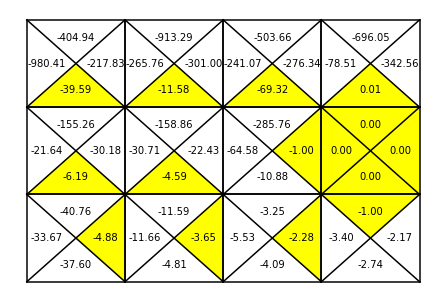

Ans 2.

觀察上圖，Terminal State的Q-value維持0，緊鄰Terminal state的狀態，指向Terminal State動作的Q-value會是-1。

(因為最後一步Return=一步Reward=-1，Swamp中的狀態可能因為不常更新而有所差異)

剩餘其他狀態下的Q-value最大值皆小於Terminal state，並且其他狀態的Q-value最大值會指向最佳策略，表示此Q-value是合理的。

Ans 3.

$\bullet\,State-values$
(畫圖時格子上下和例題1相反)

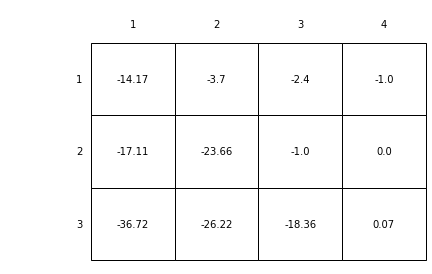

# Useful function

In [ ]:
# data type
a = [1,2,3,4]
b = np.array(a)
print(type(b))
b = b.tolist()
print(type(b))


<class 'numpy.ndarray'>
<class 'list'>


In [ ]:
# clip
a = range(5)
b = np.clip(a,1,3)
print(b)

[1 1 2 3 3]


In [ ]:
# in
a = [[1,5],[2,5],[3,5]]
print([2,5] in a,[0,0] in a)

True False


In [ ]:
# add
state = [0,0]
action = np.array([1,2])
print(action + np.array(state))

[1 2]


In [ ]:
# inversed iterate
a = range(4,0,-1)
for i in a:
  print(i)

4
3
2
1


In [ ]:
# inversed iterate
a=[1,2,3,4]
for i in reversed(a):
  print(i)

4
3
2
1
